In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import random as rd
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



C:\Users\dylan\AppData\Local\Temp\ipykernel_20836\1930607324.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Première phase :
    Recherche des outliers par plot de données

In [2]:
#Utilisation des données téléchargées
#Récupération des indices des données manquantes
n = 10
def create_data_array(directory) :
    datalist = []
    for i in range(n):
        filename = os.listdir(directory)[i]
        if filename.endswith(".npy"):
            data_day = np.load(directory + '/' + filename)
        datalist.append(data_day)
    data_raw = np.concatenate(datalist,axis=0)
    return data_raw


def grad_horizontal(A):
    return A[:,1:,:]-A[:,:-1,:]

def grad_vertical(A):
    return A[:,:,1:]-A[:,:,:-1]



In [3]:
data_raw = create_data_array(r'datatest')
# gradh=grad_horizontal(data_raw)
# gradv=grad_vertical(data_raw)

In [ ]:
#Ploting the accumulations for 30 minutes :
def accumulation_30min(data):
    return np.array([np.sum(data[6*t:6*t+6,:,:],axis=0) for t in range(len(data)//6)])

In [ ]:
data_30_min = accumulation_30min(data_raw)

plt.matshow(data_30_min[0])
plt.colorbar()
plt.legend()

In [ ]:
data_accumulated_full = np.sum(data_raw,axis=0)

plt.matshow(data_accumulated_full)
plt.colorbar()
plt.legend()



In [ ]:
# On zoom sur certaines des valeurs abhérantes

data_part1 = data_accumulated_full[100:150,:50]
data_part2 = data_accumulated_full[200:250,:50]

plt.matshow(data_part1)
plt.matshow(data_part2)
plt.colorbar()
plt.legend()


In [ ]:
plt.plot(data_part1[:,39])
plt.plot(data_part2[41,:])
plt.legend()
plt.show()


In [ ]:
List=np.argwhere(data_accumulated_full>225000)
print(List)

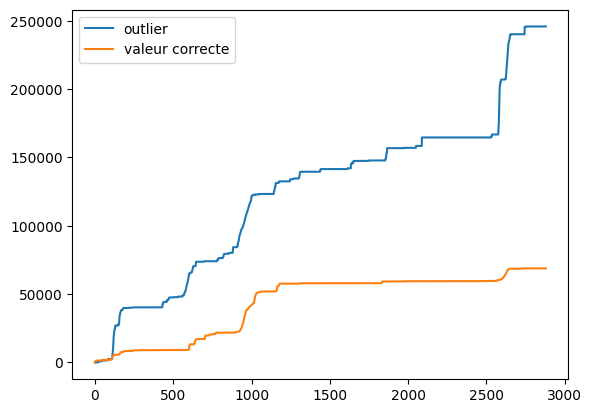

In [6]:
data_accumulated_full_values = np.cumsum(data_raw, axis=0)

plt.plot(data_accumulated_full_values[:,126,39],label='outlier')
plt.plot(data_accumulated_full_values[:,100,100],label='valeur correcte')
plt.legend()
plt.show()

In [ ]:
np.shape(data_raw)

In [ ]:
np.argwhere(data_raw[:,126,39]>5000)

In [ ]:
plt.matshow(data_raw[2584,:,:])
plt.colorbar()
plt.legend()

In [ ]:
A_test = data_raw[2584,:,:]
A_non_zero = A_test[A_test>0]
print(A_non_zero)
mu = np.mean(A_non_zero)
sigma =np.std(A_non_zero)
print(mu,sigma)
Q = np.percentile(A_test,99.995)
print(Q)

In [ ]:
plt.plot(A_test)
plt.show()

In [ ]:
percentile_99_995 = np.array([np.percentile(data_raw[t,:,:], 99.995) for t in range(np.shape(data_raw)[0])])

First_List = []

for t in range(len(percentile_99_995)):
    indices = np.argwhere(data_raw[t,:,:] >= percentile_99_995[t])
    for q in indices:
        First_List.append([t, q[0], q[1]])

print(First_List)


Deuxième phase :
    Automatisation du processus

In [ ]:
zip_file_path = "data/2018.zip"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        all_files = zip_ref.namelist()
        for file in all_files:
            if file.endswith(".npy"):
                with zip_ref.open(file) as file_in_zip:
                    npy_bytes = file_in_zip.read()
                    npy_file_like = io.BytesIO(npy_bytes)
                    npy_array = np.load(npy_file_like)
                    print(npy_array)
                    npy_file_like.close()
